In [ ]:
!wget http://motioncore-umh.cs.umn.edu/4980/sms_spam_cleaned.csv

--2023-02-27 03:04:16--  http://motioncore-umh.cs.umn.edu/4980/sms_spam_cleaned.csv
Resolving motioncore-umh.cs.umn.edu (motioncore-umh.cs.umn.edu)... 128.101.106.27
Connecting to motioncore-umh.cs.umn.edu (motioncore-umh.cs.umn.edu)|128.101.106.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 445082 (435K) [text/csv]
Saving to: ‘sms_spam_cleaned.csv.1’

sms_spam_cleaned.cs 100%[===================>] 434.65K  1.47MB/s    in 0.3s    

2023-02-27 03:04:16 (1.47 MB/s) - ‘sms_spam_cleaned.csv.1’ saved [445082/445082]



This Notebook classifies a database of text messages as spam or ham using K-means clustering, Principal Component Analysis, and Natural Language Processing. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import os

In [ ]:
categories = ["ham", "spam"]
df = pd.read_csv("sms_spam_cleaned.csv")

In [ ]:
df

,type,msg
0,ham,Go until jurong point crazy.. Available only i...
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Nah I don't think he goes to usf he lives arou...
...,...,...
5307,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5308,spam,This is the 2nd time we have tried 2 contact u...
5309,ham,Will ü b going to esplanade fr home?
5310,ham,Pity * was in mood for that. So...any other su...


In [ ]:
posts = []
ids = []
labels = np.array(df["type"])
posts = df["msg"]
ids = np.arange(0,len(labels))


In [ ]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
   def build_analyzer(self):
     analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
     return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english')
X_train = vectorizer.fit_transform(posts)

In [ ]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters, init='random', n_init=10)
km.fit(X_train)
predictions = km.predict(X_train)
print(predictions)

[1 1 1 ... 1 1 1]


In [ ]:
cluster1 = []
cluster2 = []

i = 0
for i in range(len(labels)):
  if predictions[i] == 0:
    cluster1.append(labels[i])
  elif predictions[i] == 1:
    cluster2.append(labels[i])

hamcnt = 0
spamcnt = 0
for num in cluster1:
  if num == 'ham':
    hamcnt +=1
  elif num == 'spam':
    spamcnt +=1
print("cluster1: ")
print("ham: ", hamcnt)
print("spam: ", spamcnt)

print("cluster2: ")
hamcnt = 0
spamcnt = 0
for num in cluster2:
  if num == 'ham':
    hamcnt +=1
  elif num == 'spam':
    spamcnt +=1
print("ham: ", hamcnt)
print("spam: ", spamcnt)


cluster1: 
ham:  454
spam:  1
cluster2: 
ham:  4172
spam:  685


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
posts = np.array(posts)
labels = np.array(labels)

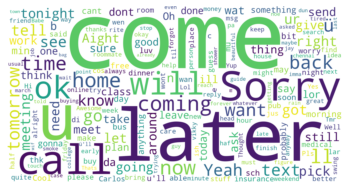

cluster size:  455
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


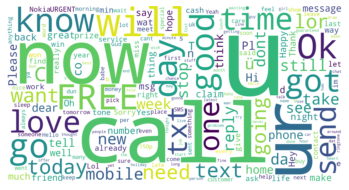

cluster size:  4857
-ham
-ham
-spam
-ham
-ham
-spam
-ham
-ham
-spam
-spam


In [ ]:
for cluster_id in range(0,num_clusters):
  matching_indices = (km.labels_== cluster_id)
  all_text = " ".join(txt for txt in posts[matching_indices.nonzero()[0]])
  word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                          width = 2048, height = 1080).generate(all_text)
  plt.imshow(word_cloud1, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  print("cluster size: ",posts[matching_indices].size)
  print("-"+"\n-".join(txt for txt in labels[matching_indices][0:10]))

In [ ]:
num_clusters = 10
km = KMeans(n_clusters=num_clusters, init='random', n_init=10)
km.fit(X_train)
predictions = km.predict(X_train)
print(predictions)

[7 3 0 ... 4 2 2]


In [ ]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []
cluster10 = []


i = 0
firstcnt = 0
secondcnt = 0
thirdcnt = 0
fourthcnt = 0
for i in range(len(labels)):
  if predictions[i] == 0:
    cluster1.append(labels[i])
  elif predictions[i] == 1:
    if labels[i] == "spam":
        print("spam in ham cluster2: ", posts[i])
    if firstcnt < 2:
      print("cluster2 ex: ", posts[i])
      firstcnt += 1
    cluster2.append(labels[i])
  elif predictions[i] == 2:
    cluster3.append(labels[i])
  elif predictions[i] == 3:
    if labels[i] == "spam":
        print("spam in ham cluster4: ", posts[i])
    if secondcnt < 2:
      print("cluster4 ex: ", posts[i])
      secondcnt += 1
    cluster4.append(labels[i])
  elif predictions[i] == 4:
    cluster5.append(labels[i])
  elif predictions[i] == 5:
    cluster6.append(labels[i])
  elif predictions[i] == 6:
    if labels[i] == 'ham':
        print("ham in spam cluster7: ", posts[i])
    if thirdcnt < 2:
      print("cluster7 ex: ", posts[i])
      thirdcnt += 1
    cluster7.append(labels[i])
  elif predictions[i] == 7:
    if labels[i] == 'ham':
        print("ham in spam cluster8: ", posts[i])
    if fourthcnt < 2:
      print("cluster8 ex: ", posts[i])
      fourthcnt += 1
    cluster8.append(labels[i])
  elif predictions[i] == 8:
    cluster9.append(labels[i])
  elif predictions[i] == 9:
    cluster10.append(labels[i])
hamcnt = 0
spamcnt = 0
for num in cluster1:
  if num == 'ham':
    hamcnt +=1
  elif num == 'spam':
    spamcnt +=1
print("cluster1: ")
print("ham: ", hamcnt)
print("spam: ", spamcnt)
percspm = spamcnt*100/(hamcnt+spamcnt)
print("percent spam: ", percspm)
print(" ")

print("cluster2: ")
hamcnt = 0
spamcnt = 0
for num in cluster2:
  if num == 'ham':
    hamcnt +=1
  elif num == 'spam':
    spamcnt +=1
print("ham: ", hamcnt)
print("spam: ", spamcnt)
percspm = spamcnt*100/(hamcnt+spamcnt)
print("percent spam: ", percspm)
print(" ")


print("cluster3: ")
hamcnt = 0
spamcnt = 0
for num in cluster3:
  if num == 'ham':
    hamcnt +=1
  elif num == 'spam':
    spamcnt +=1
print("ham: ", hamcnt)
print("spam: ", spamcnt)
percspm = spamcnt*100/(hamcnt+spamcnt)
print("percent spam: ", percspm)
print(" ")


print("cluster4: ")
hamcnt = 0
spamcnt = 0
for num in cluster4:
  if num == 'ham':
    hamcnt +=1
  elif num == 'spam':
    spamcnt +=1
print("ham: ", hamcnt)
print("spam: ", spamcnt)
percspm = spamcnt*100/(hamcnt+spamcnt)
print("percent spam: ", percspm)
print(" ")

print("cluster5: ")
hamcnt = 0
spamcnt = 0
for num in cluster5:
  if num == 'ham':
    hamcnt +=1
  elif num == 'spam':
    spamcnt +=1
print("ham: ", hamcnt)
print("spam: ", spamcnt)
percspm = spamcnt*100/(hamcnt+spamcnt)
print("percent spam: ", percspm)
print(" ")


print("cluster5: ")
hamcnt = 0
spamcnt = 0
for num in cluster5:
  if num == 'ham':
    hamcnt +=1
  elif num == 'spam':
    spamcnt +=1
print("ham: ", hamcnt)
print("spam: ", spamcnt)
percspm = spamcnt*100/(hamcnt+spamcnt)
print("percent spam: ", percspm)
print(" ")


print("cluster6: ")
hamcnt = 0
spamcnt = 0
for num in cluster6:
  if num == 'ham':
    hamcnt +=1
  elif num == 'spam':
    spamcnt +=1
print("ham: ", hamcnt)
print("spam: ", spamcnt)
percspm = spamcnt*100/(hamcnt+spamcnt)
print("percent spam: ", percspm)
print(" ")


print("cluster7: ")
hamcnt = 0
spamcnt = 0
for num in cluster7:
  if num == 'ham':
    hamcnt +=1
  elif num == 'spam':
    spamcnt +=1
print("ham: ", hamcnt)
print("spam: ", spamcnt)
percspm = spamcnt*100/(hamcnt+spamcnt)
print("percent spam: ", percspm)
print(" ")


print("cluster8: ")
hamcnt = 0
spamcnt = 0
for num in cluster8:
  if num == 'ham':
    hamcnt +=1
  elif num == 'spam':
    spamcnt +=1
print("ham: ", hamcnt)
print("spam: ", spamcnt)
percspm = spamcnt*100/(hamcnt+spamcnt)
print("percent spam: ", percspm)
print(" ")


print("cluster9: ")
hamcnt = 0
spamcnt = 0
for num in cluster9:
  if num == 'ham':
    hamcnt +=1
  elif num == 'spam':
    spamcnt +=1
print("ham: ", hamcnt)
print("spam: ", spamcnt)
percspm = spamcnt*100/(hamcnt+spamcnt)
print("percent spam: ", percspm)
print(" ")


print("cluster10: ")
hamcnt = 0
spamcnt = 0
for num in cluster10:
  if num == 'ham':
    hamcnt +=1
  elif num == 'spam':
    spamcnt +=1
print("ham: ", hamcnt)
print("spam: ", spamcnt)
percspm = spamcnt*100/(hamcnt+spamcnt)
print("percent spam: ", percspm)
print(" ")

ham in spam cluster8:  Go until jurong point crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
cluster8 ex:  Go until jurong point crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
cluster4 ex:  Ok lar... Joking wif u oni...
ham in spam cluster8:  So ü pay first lar... Then when is da stock comin...
cluster8 ex:  So ü pay first lar... Then when is da stock comin...
ham in spam cluster7:  Did you catch the bus ? Are you frying an egg ? Did you make a tea? Are you eating your mom's left over dinner ? Do you feel my Love ?
cluster7 ex:  Did you catch the bus ? Are you frying an egg ? Did you make a tea? Are you eating your mom's left over dinner ? Do you feel my Love ?
ham in spam cluster8:  Yeah he got in at 2 and was v apologetic. n had fallen out and she was actin like spoilt child and he got caught up in that. Till 2! But we won't go there! Not doing too badly cheers. You? 
ham in spam cluster7:  Did I forge

In [ ]:
msg_vec1 = vectorizer.transform(["hello, how are you doing?"]).toarray()
cluster_dists = []
for c in km.cluster_centers_:
  diff = msg_vec1-c
  dist = np.vdot(diff,diff)
  cluster_dists.append(dist)
print(cluster_dists)

[1.0336566985676716, 1.0428480825646167, 0.9926218226896766, 1.248778306590906, 1.037183438090048, 1.7121310311170002, 1.0380153468744109, 1.0539708460428412, 1.088501874873128, 1.0843184428449941]


In [ ]:
msg_vec2 = vectorizer.transform(["man i dont even know what he was talking about"]).toarray()
cluster_dists = []
for c in km.cluster_centers_:
  diff = msg_vec2-c
  dist = np.vdot(diff,diff)
  cluster_dists.append(dist)
print(cluster_dists)

[1.0287079522180829, 1.024340538646775, 0.9905995388018117, 1.232361473278865, 0.9175087838589528, 1.712131031117, 1.034608504789404, 1.058003539904309, 1.0486575365779567, 1.0776464510621233]


In [ ]:
msg_vec3 = vectorizer.transform(["Amazon is refunding you $68574.44 for your recent purchase, reply to this message with details of your bank account and we will process your refund within 5-6 business days."]).toarray()
cluster_dists = []
for c in km.cluster_centers_:
  diff = msg_vec3-c
  dist = np.vdot(diff,diff)
  cluster_dists.append(dist)
print(cluster_dists)

[1.0082750241437977, 1.0550543531264318, 0.9990846594794235, 1.2446521885937822, 1.0395452238145242, 1.712131031117, 1.0095550738205032, 1.06221702386333, 1.0920407941326662, 1.086159953534945]


In [ ]:
msg_vec4 = vectorizer.transform(["Someone special is trying to get in touch with you via our online dating service! To find out who it is call us on this number 090640184607 BOT5674SK38ch"]).toarray()
cluster_dists = []
for c in km.cluster_centers_:
  diff = msg_vec4-c
  dist = np.vdot(diff,diff)
  cluster_dists.append(dist)
print(cluster_dists)

[0.9962222337558968, 1.0380467505930544, 0.9922809681075824, 1.2434737003523832, 1.0283062169124646, 1.712131031117, 1.043525208186142, 1.0624331228710728, 1.0847732274494362, 1.0894898298469005]


In [ ]:
#A TF-IDF Vectorizer with Stemming
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
   def build_analyzer(self):
     analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
     return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english')
doc_features = vectorizer.fit_transform(posts).toarray()

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns


In [ ]:
pca = PCA(n_components=3)
pc = pca.fit_transform(doc_features)

In [ ]:
pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2', 'PC3'])
pc_df['Cluster'] = labels
pc_df['ids'] = posts
pc_df

,PC1,PC2,PC3,Cluster,ids
0,-0.020102,-0.023415,-0.004853,ham,Go until jurong point crazy.. Available only i...
1,0.265713,-0.015683,-0.030758,ham,Ok lar... Joking wif u oni...
2,-0.029360,-0.021845,-0.052390,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,-0.010199,-0.016327,-0.009375,ham,U dun say so early hor... U c already then say...
4,-0.030349,-0.023667,-0.022856,ham,Nah I don't think he goes to usf he lives arou...
...,...,...,...,...,...
5307,-0.036078,-0.020757,-0.071810,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5308,-0.032043,-0.031629,-0.018013,spam,This is the 2nd time we have tried 2 contact u...
5309,-0.008190,-0.023578,0.151185,ham,Will ü b going to esplanade fr home?
5310,-0.016545,-0.015546,-0.015181,ham,Pity * was in mood for that. So...any other su...


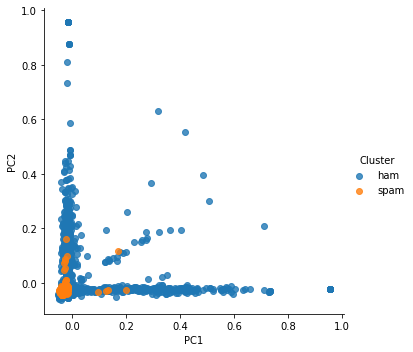

In [ ]:
sns.lmplot( x="PC1", y="PC2", fit_reg=False, data = pc_df, hue = 'Cluster')

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(pc_df, x="PC1", y="PC2", z="PC3", color = 'Cluster',hover_data=["ids"])
fig.show()

Problem 4

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
np.set_printoptions(suppress=True)
import os

In [ ]:
labels.shape

(5312,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(doc_features, labels, test_size=0.33)

In [ ]:
X_train.shape

(3559, 6863)

In [ ]:
%%time
pred = []
for test_feature in X_test:
  dist = [np.linalg.norm((test_feature - train_feature)) for train_feature in X_train]
  best_idx = np.argmin(dist)
  pred += [y_train[best_idx]]

acc = (pred==y_test).sum()/y_test.size
print("Classification accuracy is",acc,"\n")

Classification accuracy is 0.9412435824301197 

CPU times: user 1min 38s, sys: 82.1 ms, total: 1min 38s
Wall time: 1min 44s


In [ ]:
pca = PCA(n_components=500)
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
dims = np.arange(1,502,100)
accuracy = []

for dim in dims:

  pred = []
  for test_feature in X_test_pc[:,0:dim]:
    dist = [np.linalg.norm((test_feature - train_feature)) for train_feature in X_train_pc[:,0:dim]]
    best_idx = np.argmin(dist)
    pred += [y_train[best_idx]]

  acc = (pred==y_test).sum()/y_test.size
  accuracy += [acc]
  print("With",dim,"PCs the accuracy is",acc)

With 1 PCs the accuracy is 0.8488305761551626
With 101 PCs the accuracy is 0.9543639475185397
With 201 PCs the accuracy is 0.9606389047347405
With 301 PCs the accuracy is 0.9498003422703936
With 401 PCs the accuracy is 0.9480889903023388
With 501 PCs the accuracy is 0.9463776383342841


In [ ]:
dims = np.arange(1,202,25)
accuracy = []

for dim in dims:

  pred = []
  for test_feature in X_test_pc[:,0:dim]:
    dist = [np.linalg.norm((test_feature - train_feature)) for train_feature in X_train_pc[:,0:dim]]
    best_idx = np.argmin(dist)
    pred += [y_train[best_idx]]

  acc = (pred==y_test).sum()/y_test.size
  accuracy += [acc]
  print("With",dim,"PCs the accuracy is",acc)

With 1 PCs the accuracy is 0.8488305761551626


KeyboardInterrupt: ignored

In [ ]:
dims = np.arange(76,126,5)
accuracy = []

for dim in dims:

  pred = []
  for test_feature in X_test_pc[:,0:dim]:
    dist = [np.linalg.norm((test_feature - train_feature)) for train_feature in X_train_pc[:,0:dim]]
    best_idx = np.argmin(dist)
    pred += [y_train[best_idx]]

  acc = (pred==y_test).sum()/y_test.size
  accuracy += [acc]
  print("With",dim,"PCs the accuracy is",acc)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
%%time
#Split testing a training data
X_train, X_test, y_train, y_test = train_test_split(doc_features, labels, test_size=0.33)

#Fit PCA
n_components=111
pca = PCA(n_components=n_components)
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
print("Variance explained by",n_components,"PCA components:", exp_var_cumul[-1])

#1-NN Classifier
pred = []
for test_feature in X_test_pc:
  dist = [np.linalg.norm((test_feature - train_feature)) for train_feature in X_train_pc]
  best_idx = np.argmin(dist)
  pred += [y_train[best_idx]]
print(pred)
#Compute Accuracy
acc = (pred==y_test).sum()/y_test.size
accuracy += [acc]
print("1-NN Classifier ("+str(n_components)+"PCs) -- Accuracy is:",acc)
print("")



Variance explained by 111 PCA components: 0.2994534873877915
['spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ha

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(doc_features, labels, test_size=0.33)

In [ ]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def knn_classifier(X_train, y_train, X_test):
  # instantiate learning model and fit data
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  # predict the response
  pred = knn.predict(X_test)
  return pred

In [ ]:
%%time
k = 1 #awful hack!
pred = knn_classifier(X_train, y_train, X_test)
accknn = accuracy(knn_classifier, X_train, y_train, X_test, y_test)
print("accuracy for non PCA: ", accknn)


Problem 5

In [ ]:
def knn_classifier(X_train, y_train, X_test):
  # instantiate learning model and fit data
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  # predict the response
  pred = knn.predict(X_test)
  return pred

In [ ]:
def accuracy(classify, X_train, y_train, X_test, y_test):
  pred = classify(X_train, y_train, X_test)
  correct_pred = (pred == y_test)
  total_preds = y_test.size
  return correct_pred.sum()/total_preds

In [ ]:
%%time
#Split testing a training data
X_train, X_test, y_train, y_test = train_test_split(doc_features, labels, test_size=0.33)

#Fit PCA
n_components=111
pca = PCA(n_components=n_components)
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
print("Variance explained by",n_components,"PCA components:", exp_var_cumul[-1])

#k-NN Classifier
k = 5
pred = knn_classifier(X_train_pc, y_train, X_test_pc)
acc = accuracy(knn_classifier, X_train_pc, y_train, X_test_pc, y_test)
acc


Variance explained by 111 PCA components: 0.3030094343397176
CPU times: user 8.84 s, sys: 2.94 s, total: 11.8 s
Wall time: 7.98 s


0.9669138619509412